# likelihood of the marketing engagement

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# random forest 
* built multiple tree hyper parameter-fine tune panrathu 
* restrict theno.of trees rectrict depth
*min_sample_split-split node of the tree 

* when the imbalance data having to use roc curve 
* the imbalace data is identify by using response variable yes,no ithula yes rombha kammiyavum no athigamavum irukanala ithu imbalce data
* auc - 100 iruntha good ,.9 nalum good,.7to.8 nalm good ,.5 kela iruntha bad

likelihood of the customer engaged 
in predictive analysis recommend right oroduct to right customer
customer churning reduce


# 1. Load Data

In [4]:
df =pd.read_csv('D:/data_science for marketing/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [5]:
df.shape

(9134, 24)

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2. Variable Encoding

## 2.1. Response Variable: Response

In [7]:
df['Engaged'] = df['Response'].apply(lambda x:0 if x == 'No'
                                 else 1)

In [8]:
df['Engaged'].mean()

np.float64(0.14320122618786948)

## 2.2. Features

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [9]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

#### - Creating Dummy Variables

In [10]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]



In [11]:
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    categorical_features += list(encoded_df.columns)

    df = pd.concat([df, encoded_df], axis=1)
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,True,False,True,False,False,False,False,True,False,False
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,False,True,True,False,False,False,False,False,True,False
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,True,False,True,False,False,False,False,False,False,True
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,True,False,True,False,False,False,False,True,False,False
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,False,True,True,False,False,False,False,True,False,False


#### - Encoding Gender

In [59]:
df['Is.Female'] = df['Gender'].apply(lambda x:0 if x == 'F'
                                 else 1)
categorical_features.append('Is.Female')

#### - all features & response

In [60]:
all_features = continuous_features + categorical_features
response = 'Engaged'

In [61]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [62]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Is.Female,Is.Female,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,True,False,...,False,False,True,False,False,0,0,0,0,0
1,6979.535903,0,94,13,42,0,8,1131.464935,True,False,...,False,False,False,True,False,0,0,0,0,0
2,12887.431650,48767,108,18,38,0,2,566.472247,True,False,...,False,False,False,False,True,0,0,0,0,0
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,False,False,True,False,False,1,1,1,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,True,False,...,False,False,True,False,False,1,1,1,1,0


# 3. Training & Testing

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
random_seed = 42

In [65]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3,random_state=random_seed)

In [66]:
sample_df.shape

(9134, 54)

In [67]:
x_train.shape

(6393, 65)

In [68]:
x_test.shape

(2741, 65)

## 3.1. Building RandomForest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [71]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

#### - Individual Trees

* sqrt means sqrt of total column

In [72]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=737138977),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=23783001),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1378419708),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1071210223),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=914084621),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1350927240),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=402465132),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1846880212),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=642590325),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1586315209),
 DecisionTreeClassifier(max_depth=5, max_featu

In [73]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=737138977)

In [106]:
rf_model.predict(x_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
rf_model.estimators_[0].predict(x_test)[:10]

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
rf_model.estimators_[1].predict(x_test)[:10]

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
rf_model.estimators_[2].predict(x_test)[:10]

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
rf_model.estimators_[3].predict(x_test)[:10]

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
rf_model.estimators_[77].predict(x_test)[:10]

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

#### - Feature Importances

In [79]:
rf_model.feature_importances_

array([0.06406293, 0.08651914, 0.0458583 , 0.03212242, 0.04145929,
       0.01465503, 0.01875649, 0.06435681, 0.04868196, 0.00774637,
       0.00965105, 0.00493988, 0.00765392, 0.00516296, 0.01148432,
       0.00426754, 0.00096591, 0.00331041, 0.00499428, 0.00329756,
       0.00362559, 0.00075123, 0.00127214, 0.00168466, 0.00210646,
       0.0010514 , 0.00149354, 0.00123502, 0.00123337, 0.00155807,
       0.0014426 , 0.00068298, 0.00102104, 0.00488317, 0.03367663,
       0.00292788, 0.27178131, 0.02532186, 0.05637902, 0.02016726,
       0.018212  , 0.00365729, 0.00529273, 0.00632315, 0.00539177,
       0.00463186, 0.00405086, 0.00425068, 0.00275269, 0.002468  ,
       0.002185  , 0.00198327, 0.00151538, 0.00087208, 0.00133613,
       0.00184873, 0.00268734, 0.00197743, 0.00269638, 0.00228362,
       0.00164652, 0.00225477, 0.00212285, 0.0016741 , 0.0016436 ])

In [107]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.271781,EmploymentStatus.Retired
1,0.086519,Income
7,0.064357,Total.Claim.Amount
0,0.064063,Customer.Lifetime.Value
38,0.056379,Marital.Status.Divorced
8,0.048682,Sales.Channel.Agent
2,0.045858,Monthly.Premium.Auto
4,0.041459,Months.Since.Policy.Inception
34,0.033677,EmploymentStatus.Employed
3,0.032122,Months.Since.Last.Claim


## 3.2. Evaluating Models

#### - Accuracy, Precision, and Recall

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [109]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [110]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8700
Out-of-Sample Accuracy: 0.8559


In [84]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 1.0000
Out-of-Sample Precision: 0.9375


In [111]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.0756
Out-of-Sample Recall: 0.0367


#### - ROC & AUC

In [86]:
from sklearn.metrics import roc_curve, auc

In [87]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [88]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [112]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8835
Out-Sample AUC: 0.8336


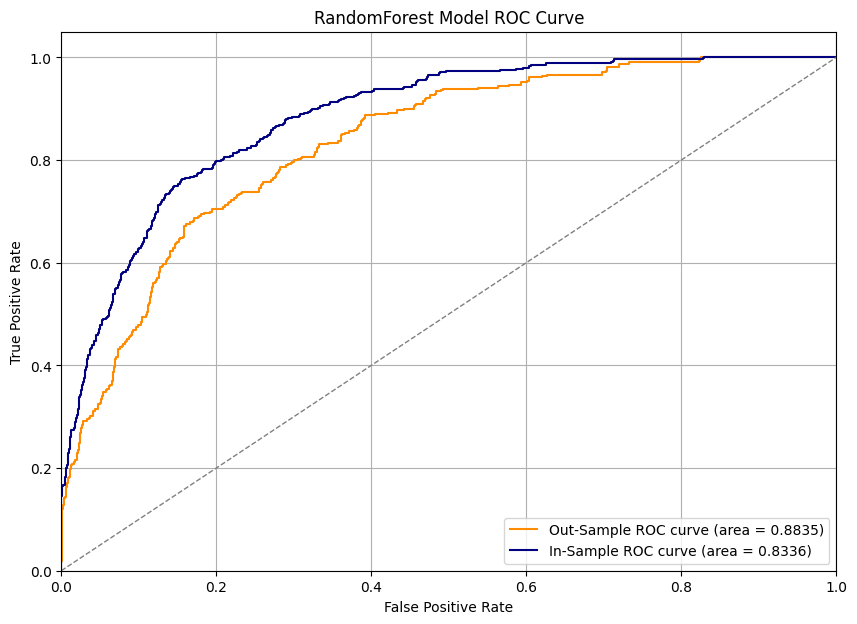

In [113]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()